In [1]:
# Import libraries need for Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
pd.set_option("display.max_columns", 100)

In [4]:
dt

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (1000, 40)


In [6]:
# Dataframe columns
dt.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
# To find the data type of the dataset
dt.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [8]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column months_as_customer has [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451

In [9]:
# Seeing for the null values in the dataset
dt.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

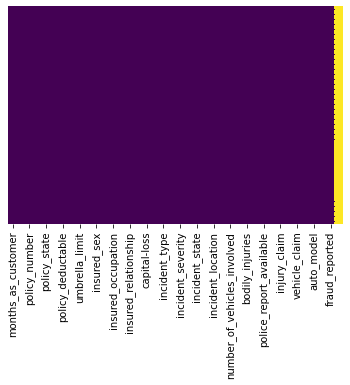

In [10]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [11]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [12]:
# To find the correlection in the dataset
dt.corr().T

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


<AxesSubplot:>

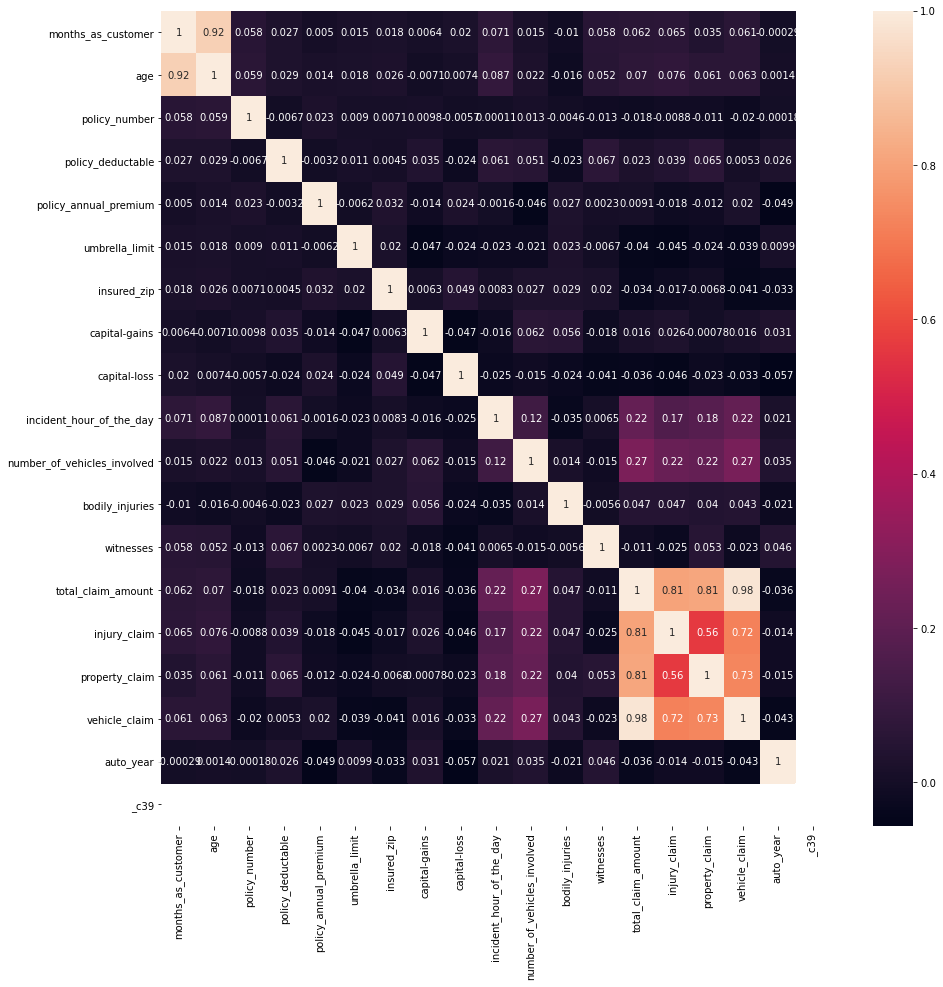

In [13]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [14]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [15]:
dt.drop(columns='_c39',axis=0,inplace=True)

In [16]:
dt.drop_duplicates(inplace=True)

In [17]:
dt

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


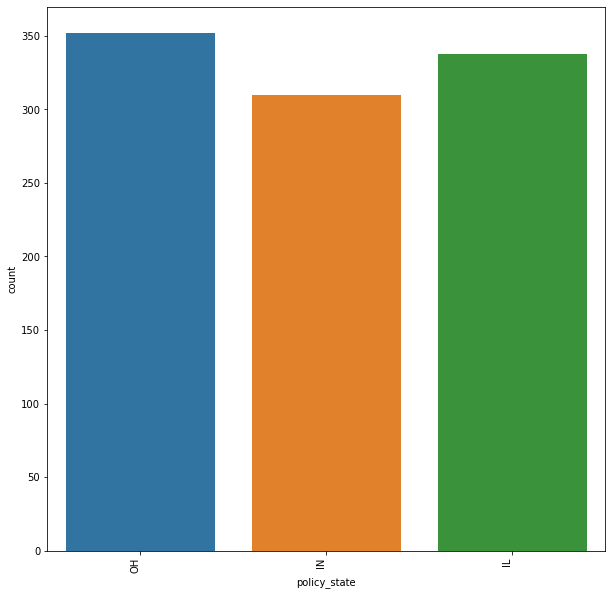

In [18]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['policy_state'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

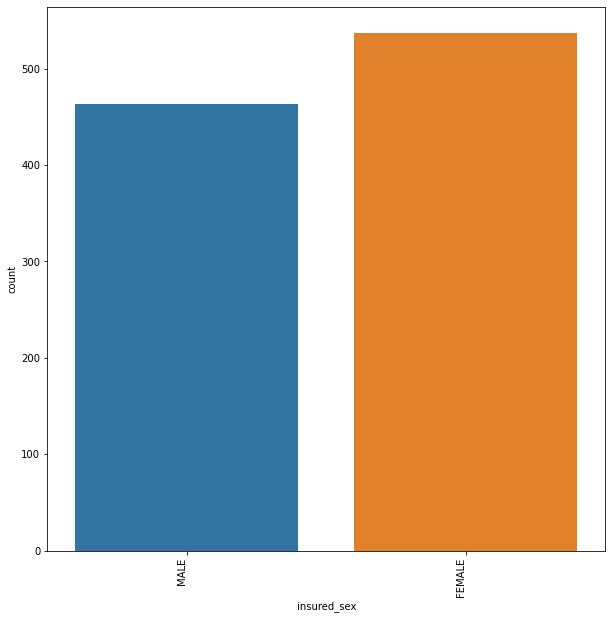

In [19]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['insured_sex'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

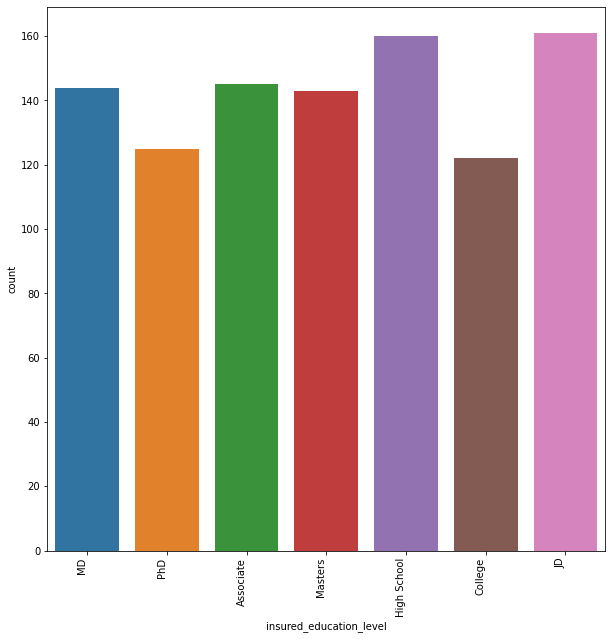

In [20]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['insured_education_level'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

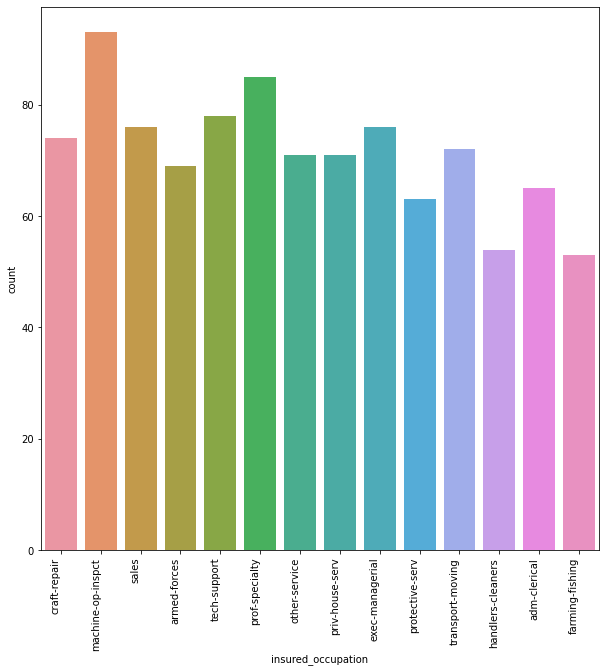

In [21]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['insured_occupation'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

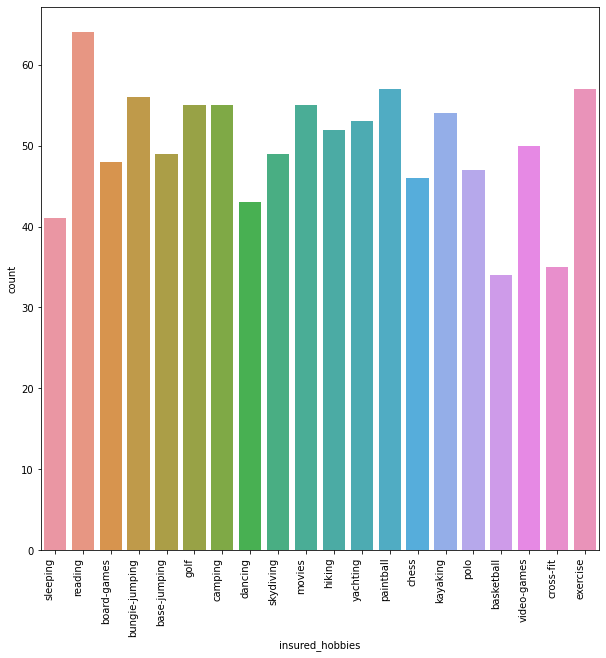

In [22]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['insured_hobbies'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

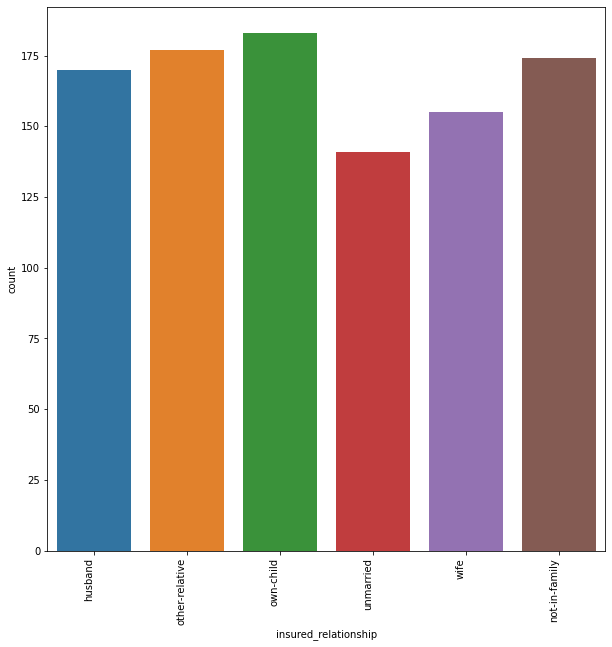

In [23]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['insured_relationship'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

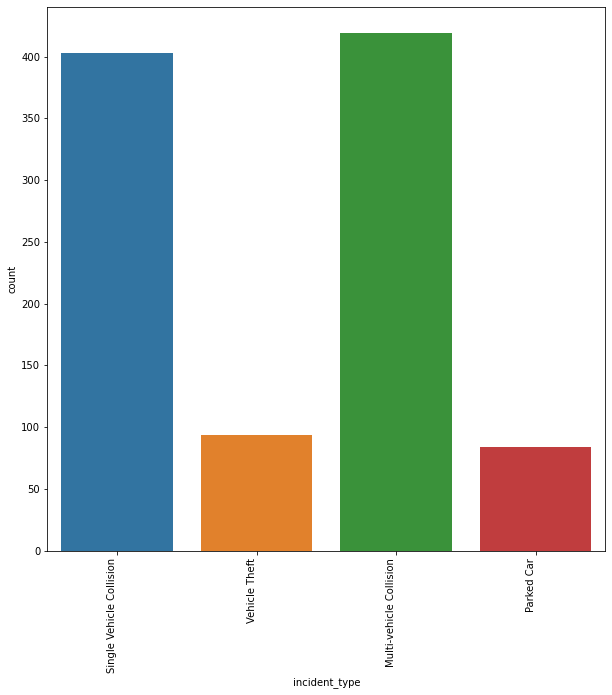

In [24]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['incident_type'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

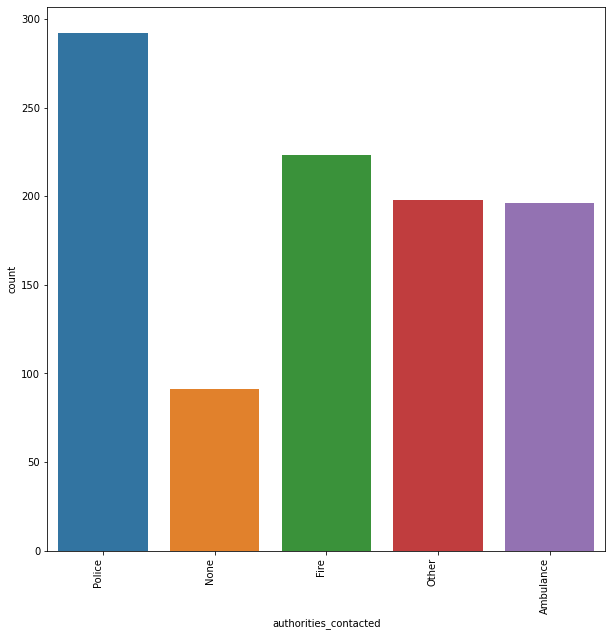

In [25]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['authorities_contacted'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

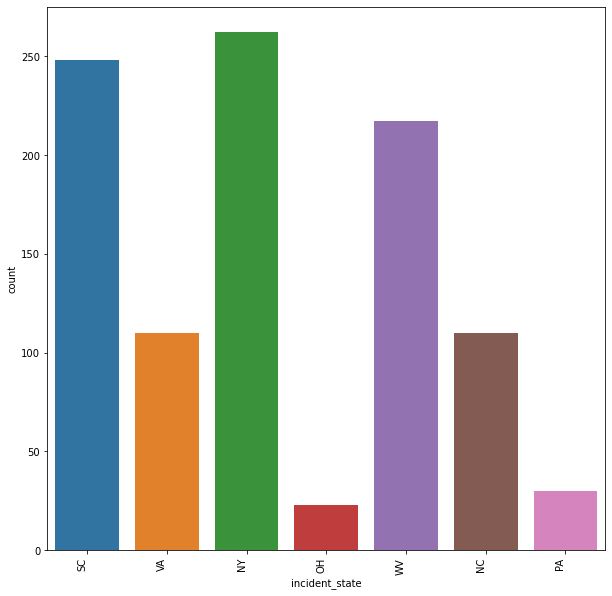

In [26]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['incident_state'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

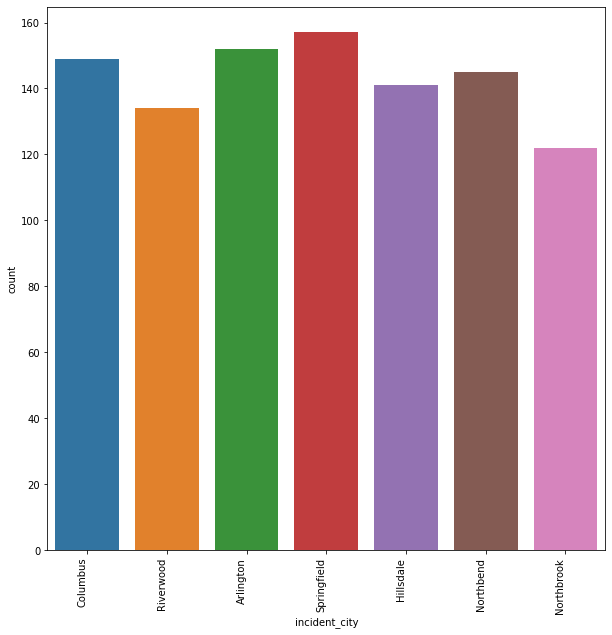

In [27]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['incident_city'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

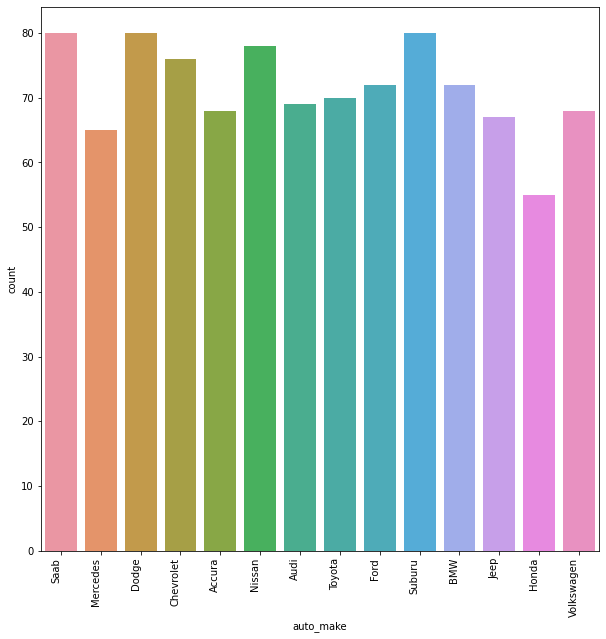

In [28]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['auto_make'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

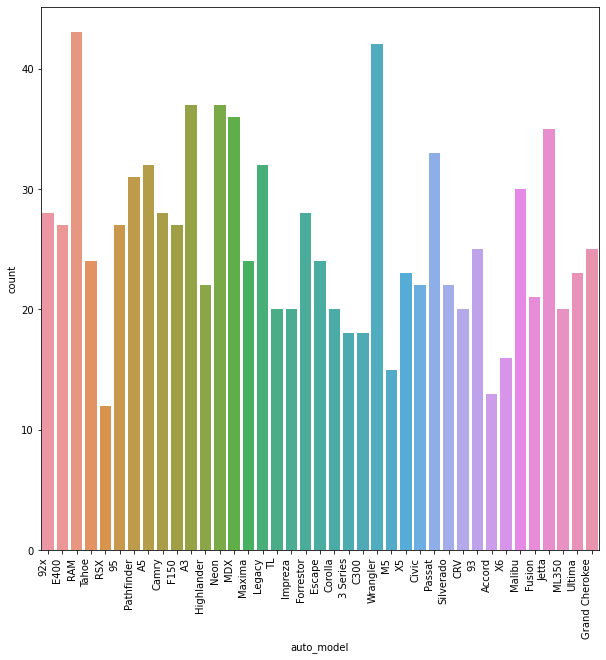

In [29]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['auto_model'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

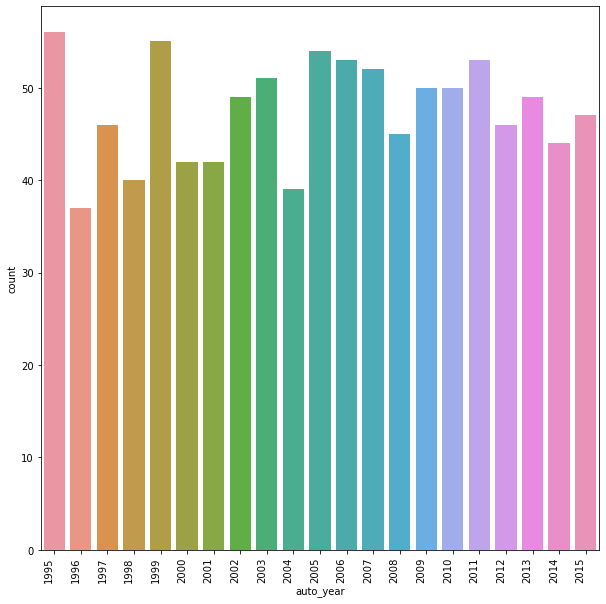

In [30]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['auto_year'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

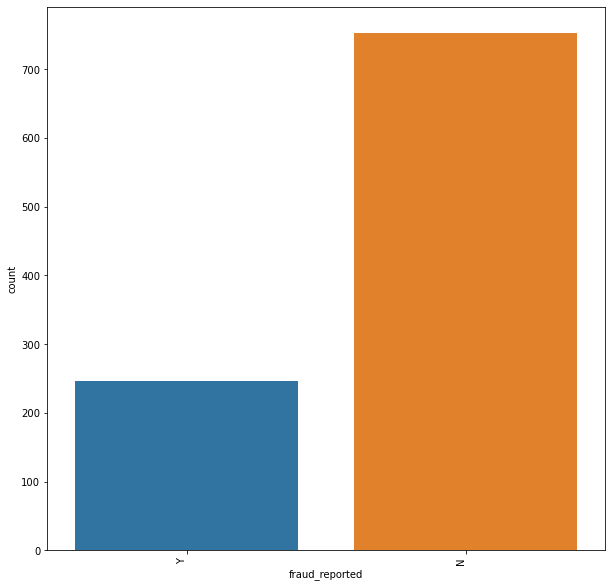

In [31]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['fraud_reported'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

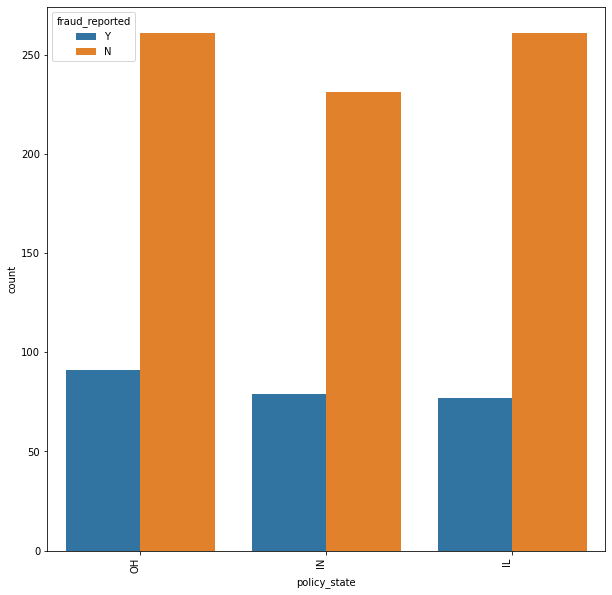

In [32]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='policy_state',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

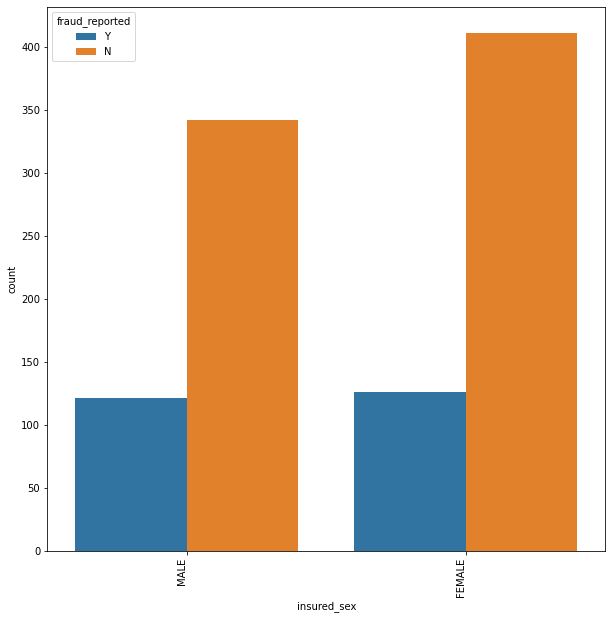

In [33]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='insured_sex',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

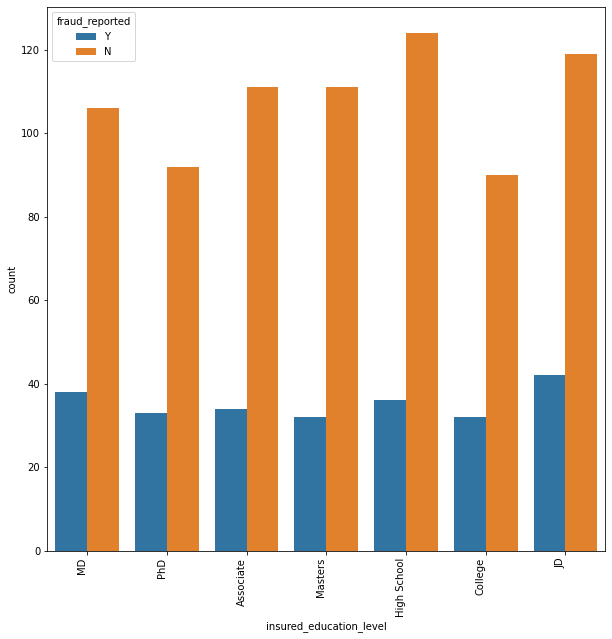

In [34]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='insured_education_level',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

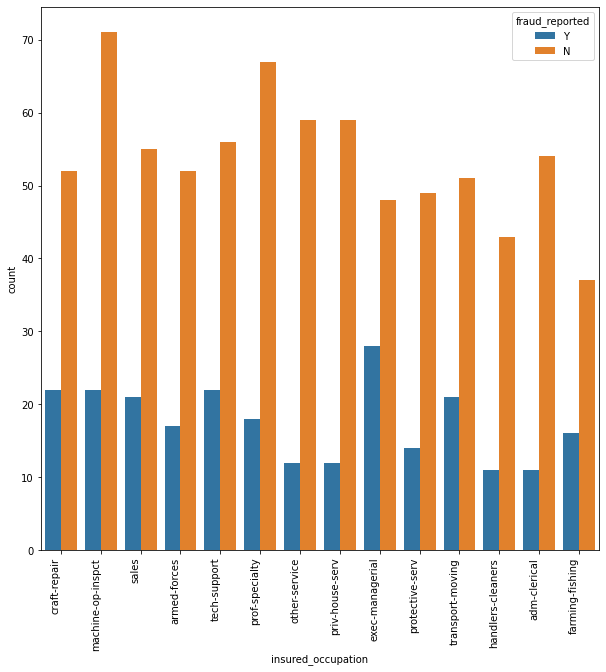

In [35]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='insured_occupation',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

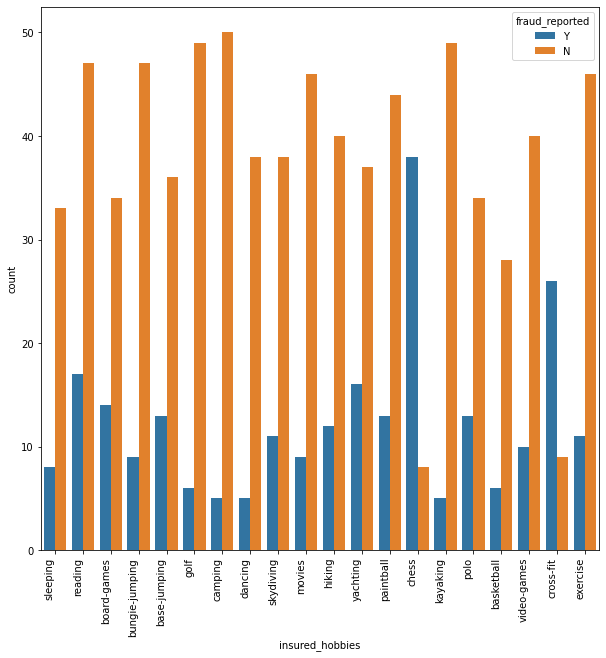

In [36]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='insured_hobbies',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

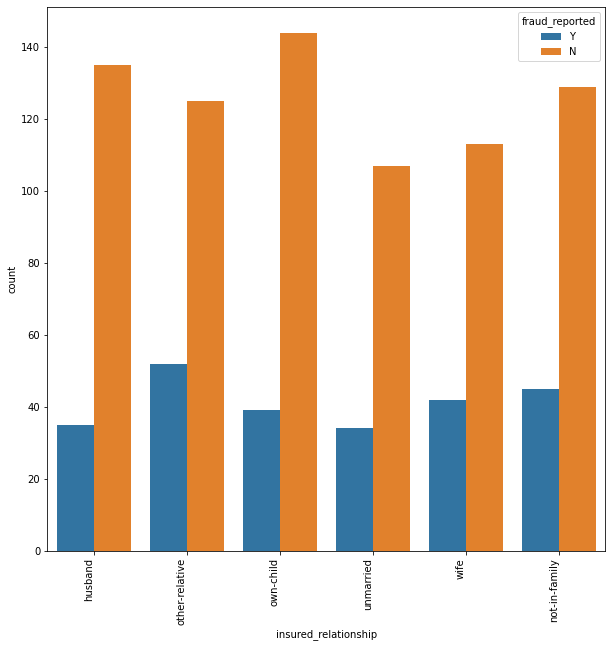

In [37]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='insured_relationship',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

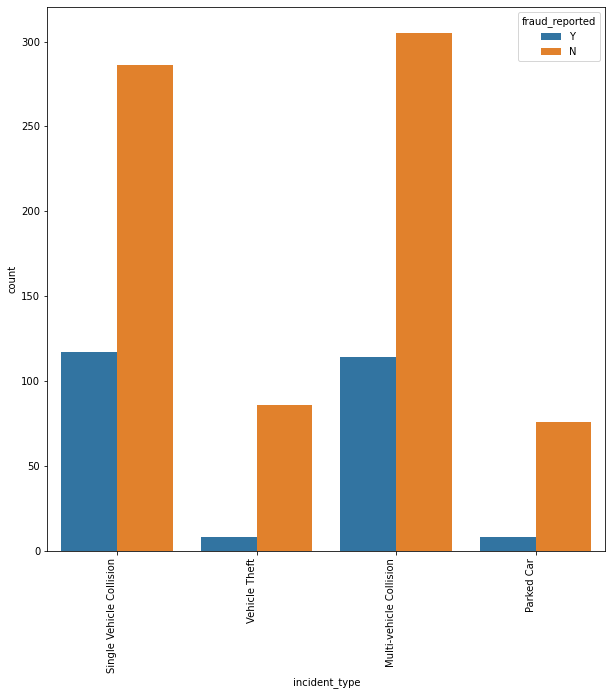

In [38]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='incident_type',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

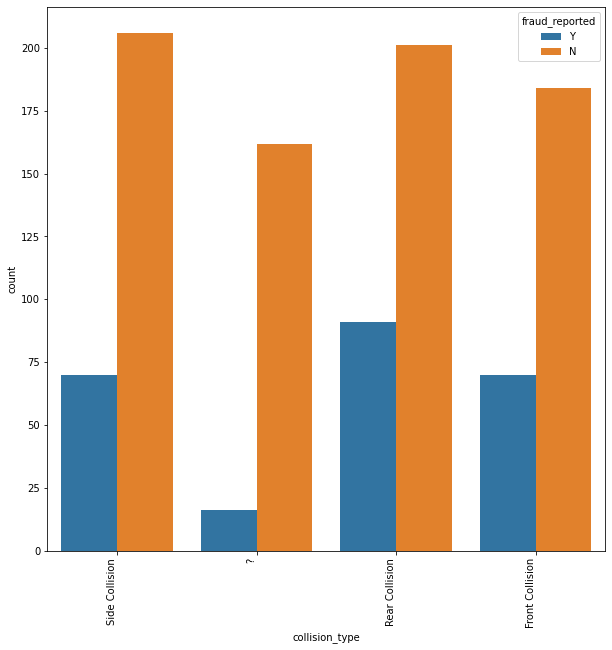

In [39]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='collision_type',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

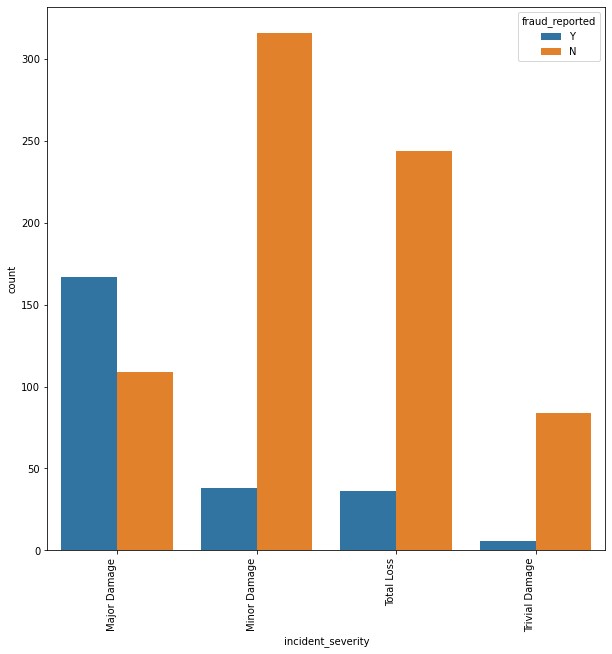

In [40]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='incident_severity',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

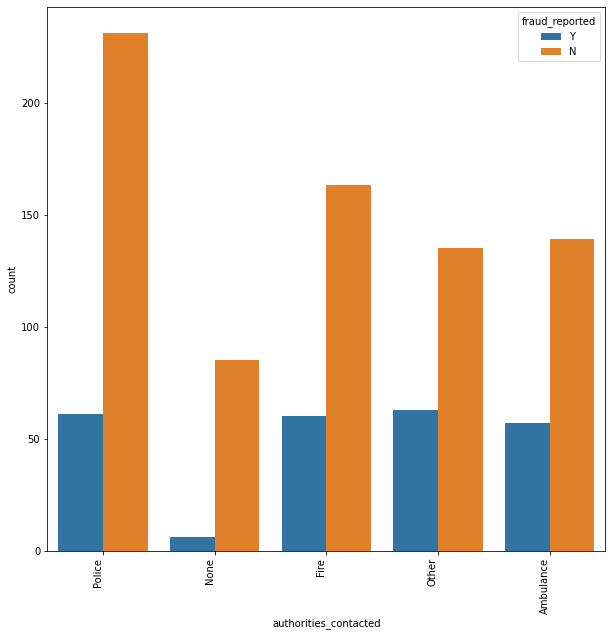

In [41]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='authorities_contacted',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

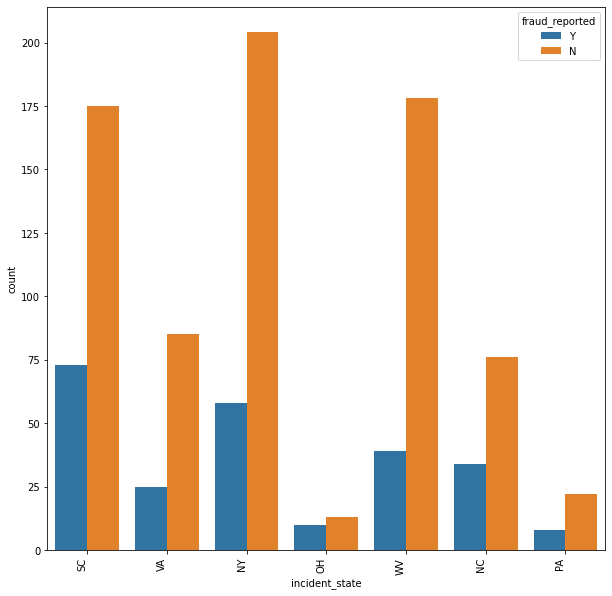

In [42]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='incident_state',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

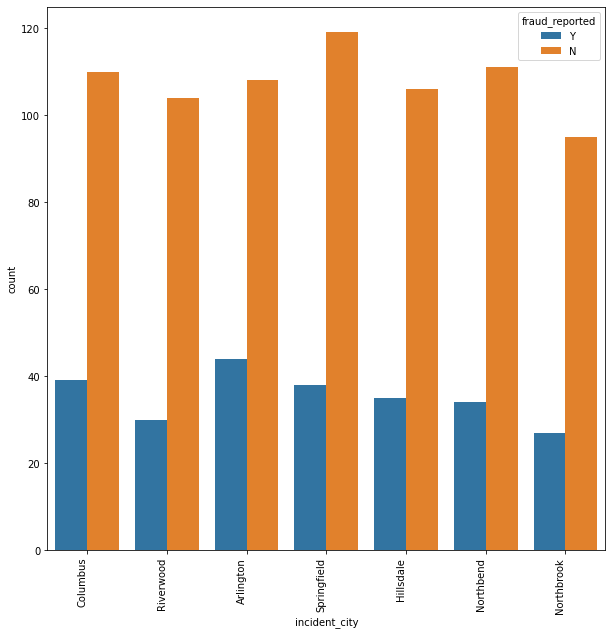

In [43]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='incident_city',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

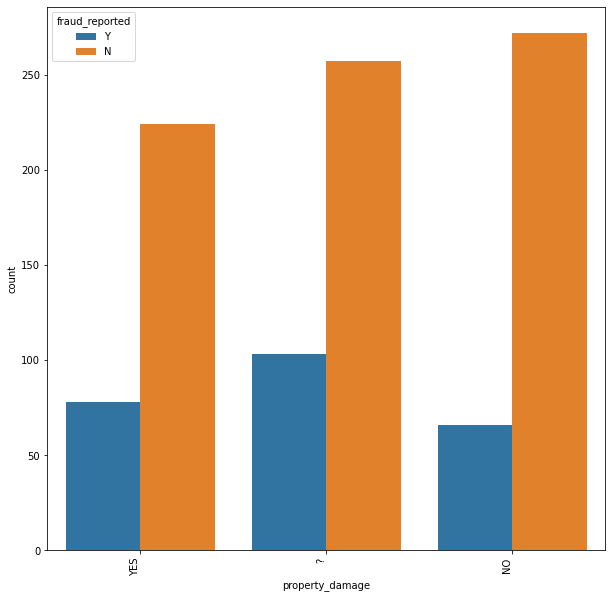

In [44]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='property_damage',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

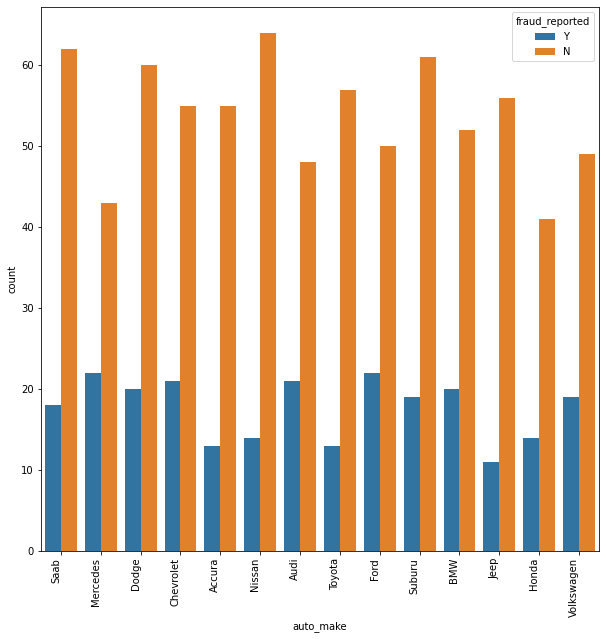

In [45]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='auto_make',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

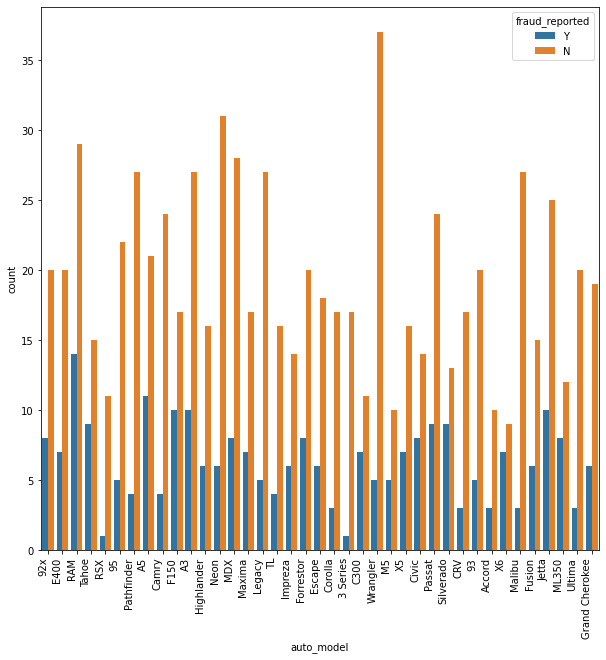

In [46]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='auto_model',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

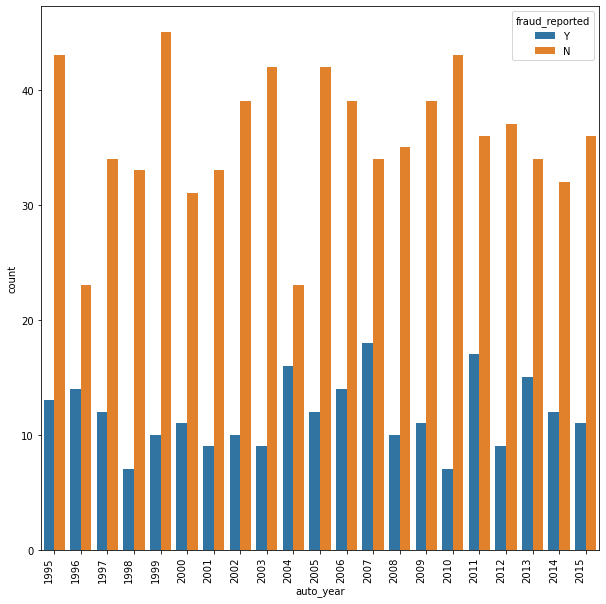

In [47]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(x='auto_year',hue='fraud_reported',data=dt)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

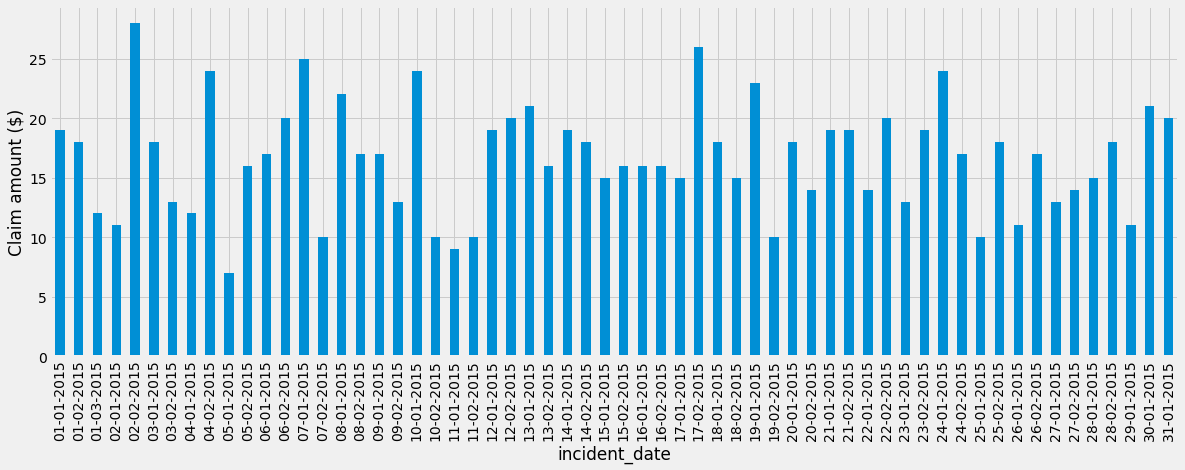

In [48]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = dt.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

In [49]:
dt

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [50]:
dt['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [51]:
dt['collision_type'].mode()[0]

'Rear Collision'

In [52]:
dt['collision_type'].replace('?',dt['collision_type'].mode()[0], inplace= True)

In [53]:
dt['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [54]:
dt['property_damage'].replace('?','NO', inplace= True)

In [55]:
dt

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [56]:
dt['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [57]:
dt['police_report_available'].replace('?','NO', inplace= True)

In [58]:
dt

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [59]:
dt.drop(columns=['policy_number','policy_bind_date','incident_date','incident_location','insured_zip'], axis=1,inplace=True)

In [60]:
dt

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [61]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [62]:
# Assigning to a variable
le=LabelEncoder()

In [63]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['policy_state']=le.fit_transform(dt['policy_state'])
dt['insured_sex']=le.fit_transform(dt['insured_sex'])
dt['insured_education_level']=le.fit_transform(dt['insured_education_level'])
dt['insured_occupation']=le.fit_transform(dt['insured_occupation'])
dt['insured_hobbies']=le.fit_transform(dt['insured_hobbies'])
dt['insured_relationship']=le.fit_transform(dt['insured_relationship'])
dt['incident_type']=le.fit_transform(dt['incident_type'])
dt['collision_type']=le.fit_transform(dt['collision_type'])
dt['incident_severity']=le.fit_transform(dt['incident_severity'])
dt['authorities_contacted']=le.fit_transform(dt['authorities_contacted'])
dt['incident_state']=le.fit_transform(dt['incident_state'])
dt['incident_city']=le.fit_transform(dt['incident_city'])
dt['police_report_available']=le.fit_transform(dt['police_report_available'])
dt['property_damage']=le.fit_transform(dt['property_damage'])
dt['fraud_reported']=le.fit_transform(dt['fraud_reported'])

In [67]:
t=pd.get_dummies(dt,columns=['policy_csl','auto_make','auto_model'],drop_first=True)

In [68]:
t

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_csl_250/500,policy_csl_500/1000,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,2004,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,2007,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,2007,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,2014,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,2009,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,17440,8720,61040,2006,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,285,41,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,18080,18080,72320,2015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
997,130,34,2,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,7500,7500,52500,1996,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,458,62,0,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,5220,5220,36540,1998,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#Upsmapling have to be performed to remove the biases
from imblearn.over_sampling import SMOTE

In [71]:
osmp=SMOTE(0.75)

In [74]:
# Assignment of X and y
X=t.drop(['fraud_reported'], axis=1)
y=t.fraud_reported

In [75]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [76]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y)

In [77]:
X_train_ns,y_train_ns=osmp.fit_resample(x_train,y_train)

In [78]:
# Importing PCA components
from sklearn.decomposition import PCA

In [79]:
pca=PCA()
pca.fit_transform(X_train_ns)

array([[ 2.73544233e+00, -6.27243240e-01,  5.15308326e-01, ...,
         4.97739544e-17, -8.11008122e-17,  9.04618242e-17],
       [-2.65371350e+00, -3.45727460e-01,  1.74731872e-01, ...,
        -3.17376504e-16,  1.80516602e-16,  1.25517272e-17],
       [-7.08901397e-01,  3.68285662e-02,  6.41605164e-01, ...,
        -5.22920003e-17, -5.29254315e-16, -7.03122819e-17],
       ...,
       [ 1.79926946e+00,  8.18886532e-01,  1.03420393e+00, ...,
        -3.43952423e-17, -1.17875689e-17,  2.31713513e-17],
       [-1.59404265e+00, -1.89869212e-01, -4.54683515e-03, ...,
        -1.68923551e-16,  7.38445212e-17, -4.59437680e-17],
       [-6.02667315e-01, -6.85783549e-01, -2.14921063e+00, ...,
        -4.66165019e-17,  3.03737072e-18,  2.00904000e-17]])

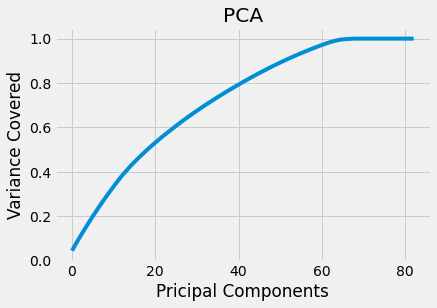

In [80]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [81]:
pca=PCA(n_components=60)
new_pcomp=pca.fit_transform(X_train_ns)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                          'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                          'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
                                          'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
                                          'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
                                          'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60'])

In [83]:
prin_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,2.735442,-0.627243,0.515308,0.510547,-0.474761,3.995584,0.003032,1.756008,-1.711538,-0.160233,-0.799029,0.222194,-0.572768,-0.237707,-0.413262,2.286982,-0.350714,0.234387,0.826599,0.144223,0.949428,1.169502,1.630919,-0.171233,1.115476,-1.039539,1.118420,-1.852727,0.077206,-0.407596,-0.269155,-0.801512,-1.278828,-0.763803,-0.681629,0.901018,0.385801,-0.746040,-0.469611,0.890235,0.155299,-0.142158,-0.636355,0.404185,0.753403,0.708608,-0.043839,-0.666431,-0.593612,-0.790303,1.586567,0.167901,-0.474287,0.316214,-0.108342,1.004246,-0.857153,-1.443885,0.399330,-0.029754
1,-2.653714,-0.345727,0.174732,-0.234877,-0.063269,1.070148,-0.170207,-0.575297,1.072317,-0.067943,-0.423038,-0.938329,-4.078030,1.137053,3.232727,-0.549833,-0.485992,0.661236,2.289982,-0.177602,-0.534033,-0.985456,-1.260434,-0.719185,1.466420,-0.158821,-0.175897,0.968018,1.434635,0.638097,0.387874,1.374803,1.269408,-0.401637,0.651144,-0.876384,-0.646602,1.208729,-2.186759,-1.416489,-0.260732,-0.032549,0.715396,0.052396,2.331296,-0.210355,0.109911,-0.001236,1.348340,-2.161282,0.141771,1.335020,-0.415576,-0.222180,-1.169807,-1.026781,-1.020159,0.579503,0.320125,0.266402
2,-0.708901,0.036829,0.641605,-0.126916,-0.369858,0.293570,-0.186620,-0.671578,0.659477,0.253867,-0.355115,-0.446099,-0.721994,1.253158,0.240789,-0.181350,0.550841,2.700009,-0.692060,-0.571078,0.151359,-0.339812,1.870000,2.209552,-0.266477,1.944606,-1.948718,-0.764369,0.968443,-1.656966,-0.249552,-0.203283,-0.095746,0.282910,2.286128,-0.421184,0.606218,-0.639356,0.718360,-1.184823,-0.691932,-0.893234,1.554997,-0.551792,0.013289,-0.270973,0.060542,-1.080930,0.469724,-1.698912,-0.013953,-0.088280,0.611309,0.988333,-0.236748,0.772186,1.342254,-0.053059,1.002529,-0.544352
3,-0.597216,-0.924898,4.297514,0.848185,4.328378,-1.504784,-0.565439,-0.024028,-0.479276,0.663964,-0.283424,-0.107540,-0.039010,0.390303,-1.222784,0.460496,0.302465,-1.720106,1.088040,0.032300,-2.178121,-1.631577,0.815075,-0.039768,0.313666,1.021935,-0.217110,-1.144033,1.932813,0.156147,-1.171464,0.969423,1.021975,-1.112784,-0.474171,-0.508066,0.996298,0.269629,0.277227,0.033195,-0.321911,0.119365,0.234018,2.126182,-0.002512,-0.044407,0.617518,-1.154946,-0.956011,0.061841,0.571456,-0.910936,0.766628,-0.461512,0.940972,0.548140,-0.360790,-0.337154,0.057294,0.407253
4,4.478484,4.724109,-0.257435,0.099849,-0.562766,-0.979968,-0.194068,1.255130,-1.091592,-0.258152,-0.044792,0.186716,-0.564426,-0.311308,-0.564622,2.292373,0.584894,0.597684,-1.309625,2.853634,1.169700,-2.264555,-0.999372,-0.190086,0.573000,-2.664860,0.502018,1.906148,0.908175,-0.292452,-0.425506,0.803807,0.449611,-0.124233,-0.974082,-1.215149,0.533441,0.334497,-1.328097,-0.209594,0.058685,-0.130630,-0.649793,-0.697614,-1.130356,-0.065405,-0.360113,-0.388617,-0.348392,0.322020,-0.398168,-1.449347,-0.202236,-0.195409,0.880639,0.158099,-0.371559,-1.454458,-0.828812,0.016775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,-0.666005,-0.915178,1.067526,-0.986454,-2.794713,-0.954618,-3.309646,-2.561215,-0.749578,1.065226,-0.470747,-0.126440,-0.234401,0.503278,-1.590513,-0.645865,-0.324885,-0.840442,0.139225,-1.206777,0.227662,1.427955,0.379226,1.207142,0.288325,-2.312917,-2.880780,-0.147630,1.201600,-0.476237,-0.854613,-0.715946,0.415493,0.423524,0.273897,0.358177,0.354947,0.837250,-0.476112,0.563036,-0.369870,0.007711,-0.727115,-0.060221,0.368997,0.221355,-0.309087,0.223663,-0.234324,-0.056332,-0.222816,0.369355,0.440010,0.359182,0.056146,-0.784204,0.309088,-0.128890,-0.844537,-0.239775
984,-0.37698

In [84]:
# Importing machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [85]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7424242424242424 random_state 1
accuracy of the optimum model 0.7424242424242424 random_state 1
accuracy of the model 0.6767676767676768 random_state 2
accuracy of the model 0.7272727272727273 random_state 3
accuracy of the model 0.7525252525252525 random_state 4
accuracy of the optimum model 0.7525252525252525 random_state 4
accuracy of the model 0.7474747474747475 random_state 5
accuracy of the model 0.7171717171717171 random_state 6
accuracy of the model 0.7171717171717171 random_state 7
accuracy of the model 0.7222222222222222 random_state 8
accuracy of the model 0.6868686868686869 random_state 9
accuracy of the model 0.7575757575757576 random_state 10
accuracy of the optimum model 0.7575757575757576 random_state 10
accuracy of the model 0.7575757575757576 random_state 11
accuracy of the model 0.702020202020202 random_state 12
accuracy of the model 0.6717171717171717 random_state 13
accuracy of the model 0.8080808080808081 random_state 14
accuracy of the opt

In [86]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8181818181818182 in random state 123


In [87]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    kn=KNeighborsClassifier()
    kn.fit(x_train, y_train)
    pred=kn.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.702020202020202 random_state 1
accuracy of the optimum model 0.702020202020202 random_state 1
accuracy of the model 0.7070707070707071 random_state 2
accuracy of the optimum model 0.7070707070707071 random_state 2
accuracy of the model 0.7171717171717171 random_state 3
accuracy of the optimum model 0.7171717171717171 random_state 3
accuracy of the model 0.6464646464646465 random_state 4
accuracy of the model 0.6919191919191919 random_state 5
accuracy of the model 0.6868686868686869 random_state 6
accuracy of the model 0.7171717171717171 random_state 7
accuracy of the model 0.7323232323232324 random_state 8
accuracy of the optimum model 0.7323232323232324 random_state 8
accuracy of the model 0.7171717171717171 random_state 9
accuracy of the model 0.7121212121212122 random_state 10
accuracy of the model 0.7272727272727273 random_state 11
accuracy of the model 0.702020202020202 random_state 12
accuracy of the model 0.6818181818181818 random_state 13
accuracy of the

In [88]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.7828282828282829 in random state 789


In [89]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    de=DecisionTreeClassifier()
    de.fit(x_train, y_train)
    pred=de.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7272727272727273 random_state 1
accuracy of the optimum model 0.7272727272727273 random_state 1
accuracy of the model 0.6868686868686869 random_state 2
accuracy of the model 0.6313131313131313 random_state 3
accuracy of the model 0.6717171717171717 random_state 4
accuracy of the model 0.7828282828282829 random_state 5
accuracy of the optimum model 0.7828282828282829 random_state 5
accuracy of the model 0.7272727272727273 random_state 6
accuracy of the model 0.6919191919191919 random_state 7
accuracy of the model 0.7727272727272727 random_state 8
accuracy of the model 0.7424242424242424 random_state 9
accuracy of the model 0.7323232323232324 random_state 10
accuracy of the model 0.7474747474747475 random_state 11
accuracy of the model 0.6919191919191919 random_state 12
accuracy of the model 0.6919191919191919 random_state 13
accuracy of the model 0.7171717171717171 random_state 14
accuracy of the model 0.7272727272727273 random_state 15
accuracy of the model 0.75

In [90]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8282828282828283 in random state 516


In [91]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    xe=XGBRFClassifier()
    xe.fit(x_train, y_train)
    pred=xe.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

[20:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7777777777777778 random_state 1
accuracy of the optimum model 0.7777777777777778 random_state 1
[20:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.7575757575757576 random_state 2
[20:29:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

In [92]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8686868686868687 in random state 136


In [93]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    ad=AdaBoostClassifier()
    ad.fit(x_train, y_train)
    pred=ad.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.7727272727272727 random_state 1
accuracy of the optimum model 0.7727272727272727 random_state 1
accuracy of the model 0.7575757575757576 random_state 2
accuracy of the model 0.7171717171717171 random_state 3
accuracy of the model 0.7878787878787878 random_state 4
accuracy of the optimum model 0.7878787878787878 random_state 4
accuracy of the model 0.797979797979798 random_state 5
accuracy of the optimum model 0.797979797979798 random_state 5
accuracy of the model 0.7171717171717171 random_state 6
accuracy of the model 0.7777777777777778 random_state 7
accuracy of the model 0.7525252525252525 random_state 8
accuracy of the model 0.803030303030303 random_state 9
accuracy of the optimum model 0.803030303030303 random_state 9
accuracy of the model 0.7727272727272727 random_state 10
accuracy of the model 0.7878787878787878 random_state 11
accuracy of the model 0.7676767676767676 random_state 12
accuracy of the model 0.7323232323232324 random_state 13
accuracy of the 

In [94]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.8434343434343434 in random state 421


In [95]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    gc=GradientBoostingClassifier()
    gc.fit(x_train, y_train)
    pred=gc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8282828282828283 random_state 1
accuracy of the optimum model 0.8282828282828283 random_state 1
accuracy of the model 0.8080808080808081 random_state 2
accuracy of the model 0.8080808080808081 random_state 3
accuracy of the model 0.803030303030303 random_state 4
accuracy of the model 0.898989898989899 random_state 5
accuracy of the optimum model 0.898989898989899 random_state 5
accuracy of the model 0.8080808080808081 random_state 6
accuracy of the model 0.8383838383838383 random_state 7
accuracy of the model 0.8282828282828283 random_state 8
accuracy of the model 0.8585858585858586 random_state 9
accuracy of the model 0.8232323232323232 random_state 10
accuracy of the model 0.8686868686868687 random_state 11
accuracy of the model 0.8383838383838383 random_state 12
accuracy of the model 0.7676767676767676 random_state 13
accuracy of the model 0.8636363636363636 random_state 14
accuracy of the model 0.8484848484848485 random_state 15
accuracy of the model 0.83838

In [96]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9090909090909091 in random state 611


In [97]:
# Finding the random state 
maxAc=0
maxrs=0

for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=i)
    sc=SVC()
    sc.fit(x_train, y_train)
    pred=sc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('accuracy of the model', acc,'random_state', i)
    
    if acc>maxAc:
        maxAc=acc
        maxrs=i
        print ('accuracy of the optimum model', acc,'random_state', i)

accuracy of the model 0.8080808080808081 random_state 1
accuracy of the optimum model 0.8080808080808081 random_state 1
accuracy of the model 0.8131313131313131 random_state 2
accuracy of the optimum model 0.8131313131313131 random_state 2
accuracy of the model 0.797979797979798 random_state 3
accuracy of the model 0.8131313131313131 random_state 4
accuracy of the model 0.8333333333333334 random_state 5
accuracy of the optimum model 0.8333333333333334 random_state 5
accuracy of the model 0.803030303030303 random_state 6
accuracy of the model 0.8333333333333334 random_state 7
accuracy of the model 0.7929292929292929 random_state 8
accuracy of the model 0.8181818181818182 random_state 9
accuracy of the model 0.8333333333333334 random_state 10
accuracy of the model 0.8232323232323232 random_state 11
accuracy of the model 0.7474747474747475 random_state 12
accuracy of the model 0.7777777777777778 random_state 13
accuracy of the model 0.8484848484848485 random_state 14
accuracy of the optim

In [98]:
print ('Optimum accuracy is obtaned in', maxAc, 'in random state', maxrs)

Optimum accuracy is obtaned in 0.9040404040404041 in random state 122


In [99]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=123)
lr=LogisticRegression()
lr.fit(x_train, y_train)
pred1=lr.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuracy of the model', acc,'random_state', 123)
print(classification_report(y_test,pred1))

accuracy of the model 0.8181818181818182 random_state 123
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       113
           1       0.80      0.76      0.78        85

    accuracy                           0.82       198
   macro avg       0.82      0.81      0.81       198
weighted avg       0.82      0.82      0.82       198



In [100]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=789)
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
pred2=kn.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('accuracy of the model', acc,'random_state', 789)
print(classification_report(y_test,pred2))

accuracy of the model 0.7828282828282829 random_state 789
              precision    recall  f1-score   support

           0       0.92      0.64      0.75       102
           1       0.71      0.94      0.81        96

    accuracy                           0.78       198
   macro avg       0.81      0.79      0.78       198
weighted avg       0.82      0.78      0.78       198



In [101]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=516)
de=DecisionTreeClassifier()
de.fit(x_train, y_train)
pred3=de.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('accuracy of the model', acc,'random_state', 516)
print(classification_report(y_test,pred3))

accuracy of the model 0.8181818181818182 random_state 516
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       117
           1       0.75      0.83      0.79        81

    accuracy                           0.82       198
   macro avg       0.81      0.82      0.81       198
weighted avg       0.82      0.82      0.82       198



In [102]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=136)
xe=XGBRFClassifier()
xe.fit(x_train, y_train)
pred4=xe.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('accuracy of the model', acc,'random_state', 136)
print(classification_report(y_test,pred4))

[21:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of the model 0.8686868686868687 random_state 136
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       114
           1       0.83      0.87      0.85        84

    accuracy                           0.87       198
   macro avg       0.86      0.87      0.87       198
weighted avg       0.87      0.87      0.87       198



In [103]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=421)
ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
pred5=ad.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('accuracy of the model', acc,'random_state', 421)
print(classification_report(y_test,pred5))

accuracy of the model 0.8434343434343434 random_state 421
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.83      0.84      0.83        93

    accuracy                           0.84       198
   macro avg       0.84      0.84      0.84       198
weighted avg       0.84      0.84      0.84       198



In [104]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=611)
gc=GradientBoostingClassifier()
gc.fit(x_train, y_train)
pred6=gc.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('accuracy of the model', acc,'random_state', 611)
print(classification_report(y_test,pred6))

accuracy of the model 0.9141414141414141 random_state 611
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       108
           1       0.92      0.89      0.90        90

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



In [105]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=122)
sc=SVC()
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 122)
print(classification_report(y_test,pred7))

accuracy of the model 0.9040404040404041 random_state 122
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       124
           1       0.85      0.91      0.88        74

    accuracy                           0.90       198
   macro avg       0.89      0.90      0.90       198
weighted avg       0.91      0.90      0.90       198



In [106]:
#Ploting ROC and AUC curves
from sklearn.metrics import roc_curve,auc
fpr1,tpr1,thresholds=roc_curve(y_test,pred1)
roc_auc1=auc(fpr1,tpr1)
fpr2,tpr2,thresholds=roc_curve(y_test,pred2)
roc_auc2=auc(fpr2,tpr2)
fpr3,tpr3,thresholds=roc_curve(y_test,pred3)
roc_auc3=auc(fpr3,tpr3)
fpr4,tpr4,thresholds=roc_curve(y_test,pred4)
roc_auc4=auc(fpr4,tpr4)
fpr5,tpr5,thresholds=roc_curve(y_test,pred5)
roc_auc5=auc(fpr5,tpr5)
fpr6,tpr6,thresholds=roc_curve(y_test,pred6)
roc_auc6=auc(fpr6,tpr6)
fpr7,tpr7,thresholds=roc_curve(y_test,pred7)
roc_auc7=auc(fpr7,tpr7)

In [107]:
print(roc_auc1,
      roc_auc2,
      roc_auc3,
      roc_auc4,
      roc_auc5,
      roc_auc6,
      roc_auc7)

0.4862685265911072 0.5273539668700958 0.4971665213600697 0.5227768090671316 0.5848953792502178 0.5483870967741936 0.9043156059285091


In [108]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [3, 2,1, 0.1, 0.01],
              'kernel': ['rbf']}

In [109]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(SVC(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [111]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=122)
sc=SVC(C=10, gamma=0.1, kernel='rbf')
sc.fit(x_train, y_train)
pred7=sc.predict(x_test)
acc=accuracy_score(y_test,pred7)
print('accuracy of the model', acc,'random_state', 122)
print(classification_report(y_test,pred7))

accuracy of the model 0.9393939393939394 random_state 122
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       124
           1       1.00      0.84      0.91        74

    accuracy                           0.94       198
   macro avg       0.96      0.92      0.93       198
weighted avg       0.94      0.94      0.94       198



In [112]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params={'loss' : ['log_loss', 'deviance'],'learning_rate': [0.001,0.01,0.1, 1, 10, 100],
              'n_estimators': range(2,10),
              'criterion': ['friedman_mse', 'squared_error', 'mse'],
       'min_samples_leaf':range(2,10)}

In [113]:
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(GradientBoostingClassifier(),param_grid=params)
g.fit(x_train,y_train)
print('The best parameters are ', g.best_params_)

The best parameters are  {'criterion': 'friedman_mse', 'learning_rate': 1, 'loss': 'deviance', 'min_samples_leaf': 3, 'n_estimators': 8}


In [131]:
x_train,x_test,y_train, y_test=train_test_split(prin_comp,y_train_ns,test_size=.20, random_state=611)
gc=GradientBoostingClassifier(criterion='friedman_mse', learning_rate= 0.1, loss='deviance', min_samples_leaf= 3, n_estimators=8)
gc.fit(x_train, y_train)
pred6=gc.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('accuracy of the model', acc,'random_state', 611)
print(classification_report(y_test,pred6))

accuracy of the model 0.7171717171717171 random_state 611
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       108
           1       0.83      0.48      0.61        90

    accuracy                           0.72       198
   macro avg       0.75      0.70      0.69       198
weighted avg       0.75      0.72      0.70       198



In [ ]:
#pickling
import pickle
filename = 'icfd'
outfile = open(filename,'icfd')
pickle.dump(icfd_dict,outfile)
outfile.close()

# Conclusion
The insurance fraud detection dataset was analysed and encoding was done before the dataset was used to machine learning. Although in gradient boosting we get accuracy of the model 0.9090909090909091 random_state 611 but after hyperparameter tuning we get accuracy of the model 0.7171717171717171 random_state 611 and AUC as 0.5483870967741936. So the accuracy of the model 0.9393939393939394 random_state 122 in SVC().